         n  Left Hand Riemann Sum  Right Hand Riemann Sum  Midpoint Sum  Trapezoidal Rule Sum  Simpson's Rule Sum  Exact Integral
0        2               8.000000               40.000000     20.000000             24.000000           21.333333       21.333333
1        4              14.000000               30.000000     21.000000             22.000000           21.333333       21.333333
2        6              16.296296               26.962963     21.185185             21.629630           21.333333       21.333333
3        8              17.500000               25.500000     21.250000             21.500000           21.333333       21.333333
4       10              18.240000               24.640000     21.280000             21.440000           21.333333       21.333333
5       12              18.740741               24.074074     21.296296             21.407407           21.333333       21.333333
6       14              19.102041               23.673469     21.306122             21.387

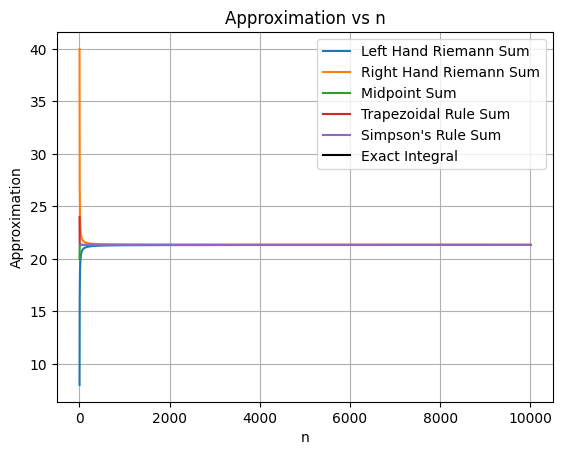

In [17]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return  x**2

a = 0
b = 4


n_values = []

n=2
while n<10000:
    n_values.append(n)
    n+=2


left_riemann_sum_values = []
right_riemann_sum_values = []
midpoint_sum_values = []
trapezoidal_sum_values = []
simpsons_sum_values = []


exact_integral = (1/3) * (b**3 - a**3)


for n in n_values:
    delta_x = (b - a) / n


    left_sum = sum(f(a + i * delta_x) * delta_x for i in range(n))
    left_riemann_sum_values.append(left_sum)


    right_sum = sum(f(a + (i + 1) * delta_x) * delta_x for i in range(n))
    right_riemann_sum_values.append(right_sum)


    midpoint_sum = sum(f(a + (i + 0.5) * delta_x) * delta_x for i in range(n))
    midpoint_sum_values.append(midpoint_sum)


    trapezoidal_sum = 0.5 * delta_x * (f(a) + f(b) + 2 * sum(f(a + i * delta_x) for i in range(1, n)))
    trapezoidal_sum_values.append(trapezoidal_sum)


    x_values = np.linspace(a, b, n + 1)
    y_values = f(x_values)
    simpsons_sum = (delta_x / 3) * (y_values[0] + 4 * sum(y_values[1:-1:2]) + 2 * sum(y_values[2:-2:2]) + y_values[-1])
    simpsons_sum_values.append(simpsons_sum)



import pandas as pd
results_table = pd.DataFrame({
    'n': n_values,
    'Left Hand Riemann Sum': left_riemann_sum_values,
    'Right Hand Riemann Sum': right_riemann_sum_values,
    'Midpoint Sum': midpoint_sum_values,
    'Trapezoidal Rule Sum': trapezoidal_sum_values,
    "Simpson's Rule Sum": simpsons_sum_values,
    'Exact Integral': [exact_integral] * len(n_values)
})

pd.set_option('display.max_rows', None)
pd.set_option('display.width', 100000)
pd.set_option('display.max_columns', 100)

print(results_table)



plt.plot(n_values, left_riemann_sum_values, label='Left Hand Riemann Sum')
plt.plot(n_values, right_riemann_sum_values, label='Right Hand Riemann Sum')
plt.xlabel('n')
plt.plot(n_values, midpoint_sum_values, label='Midpoint Sum')
plt.ylabel('Approximation')
plt.plot(n_values, trapezoidal_sum_values, label='Trapezoidal Rule Sum')
plt.plot(n_values, simpsons_sum_values, label="Simpson's Rule Sum")
plt.title('Approximation vs n')
plt.plot(exact_integral, color='black', label='Exact Integral')
plt.legend()
plt.grid(True)
plt.show()
